In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.datasets import get_rdataset

<ipython-input-7-be0331f9d9ce>:33: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(

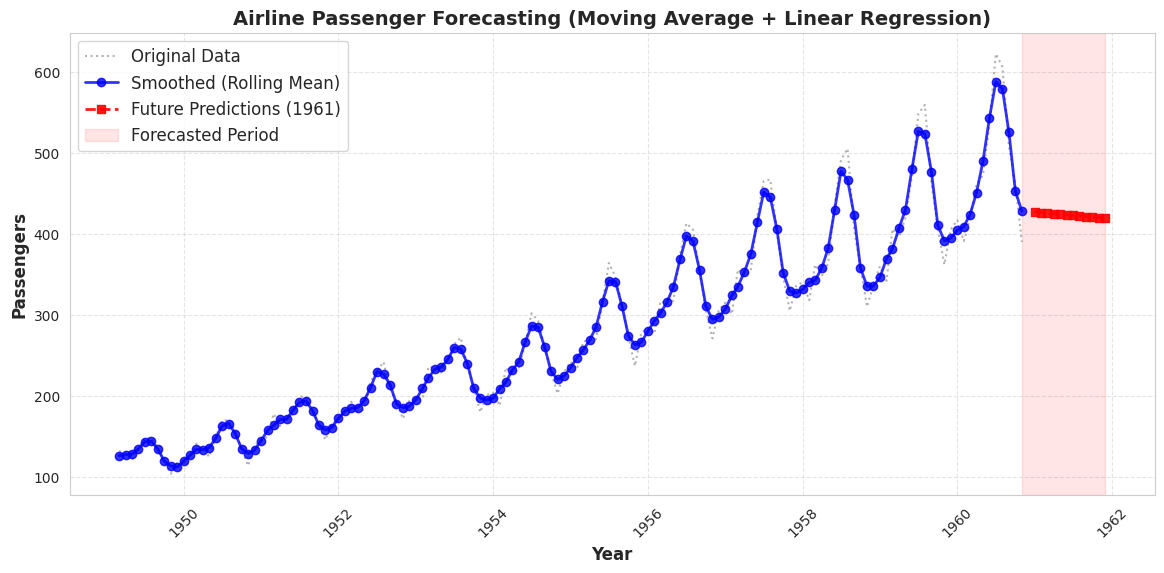

🔮 Future Predictions for 1961:
            Predicted_Passengers
Month                           
1960-12-31            426.904386
1961-01-31            426.157224
1961-02-28            425.424881
1961-03-31            424.707063
1961-04-30            424.003482
1961-05-31            423.313856
1961-06-30            422.637908
1961-07-31            421.975367
1961-08-31            421.325967
1961-09-30            420.689446
1961-10-31            420.065551
1961-11-30            419.454029


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# 🔹 Load Airline Passenger Dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url)

# 🔹 Convert 'Month' to DateTime and set as index
df["Month"] = pd.to_datetime(df["Month"])
df.set_index("Month", inplace=True)

# 🔹 Apply Moving Average Smoothing (3-month rolling mean)
df["Smoothed"] = df["Passengers"].rolling(window=3, center=True).mean()

# 🔹 Create Lag Feature (Previous month's smoothed value)
df["Lag1"] = df["Smoothed"].shift(1)

# 🔹 Drop NaN values
df.dropna(inplace=True)

# 🔹 Define Features (X) and Target (y)
X = df[["Lag1"]]
y = df["Smoothed"]

# 🔹 Train Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# 🔹 Predict Future 12 Months (1961 Forecast)
future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')
future_predictions = []
last_value = df["Smoothed"].iloc[-1]  # Start from last known smoothed value

for _ in range(12):
    next_pred = model.predict([[last_value]])[0]
    future_predictions.append(next_pred)
    last_value = next_pred  # Use predicted value for next step

# 🔹 Create Future Prediction DataFrame
future_df = pd.DataFrame({"Month": future_dates, "Predicted_Passengers": future_predictions})
future_df.set_index("Month", inplace=True)

# 🔹 Plot with Enhanced Visualization
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")

# 🔹 Plot Original Data (Gray Dotted Line)
plt.plot(df.index, df["Passengers"], label="Original Data", color="gray", linestyle='dotted', alpha=0.6)

# 🔹 Plot Smoothed Data (Blue Line with Circles)
plt.plot(df.index, df["Smoothed"], label="Smoothed (Rolling Mean)", color="blue", marker='o', linestyle='solid', linewidth=2, alpha=0.8)

# 🔹 Plot Future Predictions (Red Dashed Line with Squares)
plt.plot(future_df.index, future_df["Predicted_Passengers"], label="Future Predictions (1961)", color="red", marker='s', linestyle='dashed', linewidth=2, alpha=0.9)

# 🔹 Highlight Future Region
plt.axvspan(df.index[-1], future_df.index[-1], color='red', alpha=0.1, label="Forecasted Period")

# 🔹 Labels & Titles
plt.legend(fontsize=12)
plt.xlabel("Year", fontsize=12, fontweight='bold')
plt.ylabel("Passengers", fontsize=12, fontweight='bold')
plt.title("Airline Passenger Forecasting (Moving Average + Linear Regression)", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)

# 🔹 Show Plot
plt.show()

# 🔹 Print Future Predictions Table
print("🔮 Future Predictions for 1961:")
print(future_df)
